In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [58]:
def refresh():
  plt.show()
  plt.close()

In [59]:
# load dataset
df = pd.read_csv("Iris.csv")

# only keep Iris Verginica and Iris Setosa
df = df.drop(df[df['Plant Class'] == 2].index)

#separate versicolor from setosa
class_versi = df[df['Plant Class'] == 3]
class_setosa = df[df['Plant Class'] == 1]


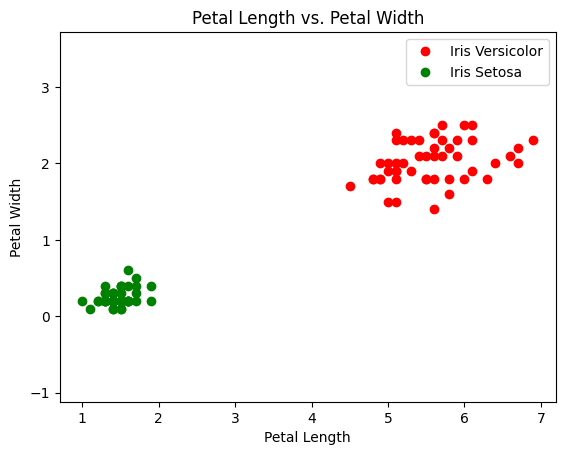

In [60]:
#plot a scatter plot of petal length vs. petal width
xleft, xright, ylow, yhigh = (0, 0, 0, 0) # return the current xlim

def set_pltlimits():
  plt.ylim(ylow, yhigh)     # set the xlim to left, right
  plt.xlim(xleft, xright)     # set the xlim to left, right

def plot_versi_setosa(labels = ['Iris Versicolor', 'Iris Setosa']):
  axes = plt.gca()
  c = 0
  colors = 'rg'
  for species in (class_versi, class_setosa):
    plt.plot(species['Petal Length'], species['Petal Width'], colors[c]+'o')
    c += 1
  global xleft, xright, ylow, yhigh
  xleft, xright = plt.xlim()  # return the current xlim

  plt.xlim(xleft, xright)     # set the xlim to left, right

  ylow, yhigh = plt.ylim()  # return the current xlim

  plt.ylim(ylow, yhigh)     # set the xlim to left, right

  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.title('Petal Length vs. Petal Width')
  plt.axis('equal')
  plt.legend(labels)

plot_versi_setosa()
refresh()

In [61]:
# 2.
# keeping only petal length and width as features,
features = ["Petal Length", "Petal Width"]
X_setosa = class_setosa[features].to_numpy()
X_versi = class_versi[features].to_numpy()

# find and write down the mean vector
mean_setosa = np.mean(X_setosa, axis=0)
mean_versi = np.mean(X_versi, axis=0)
print("mean vector of Iris Setosa")
print(np.around(mean_setosa, 2))
print("mean vector of Iris Versicolor ")
print(np.around(mean_versi, 2))

# find and write down the covariance matrix
cov_setosa = np.cov(X_setosa, rowvar=False)
cov_versi = np.cov(X_versi, rowvar=False)
print("covariance matrix of Iris Setosa")
print(np.around(cov_setosa, 2))
print("covariance matrix of Iris Versicolor")
print(np.around(cov_versi, 2))

mean vector of Iris Setosa
[1.46 0.25]
mean vector of Iris Versicolor 
[5.55 2.03]
covariance matrix of Iris Setosa
[[0.03 0.01]
 [0.01 0.01]]
covariance matrix of Iris Versicolor
[[0.3  0.05]
 [0.05 0.08]]


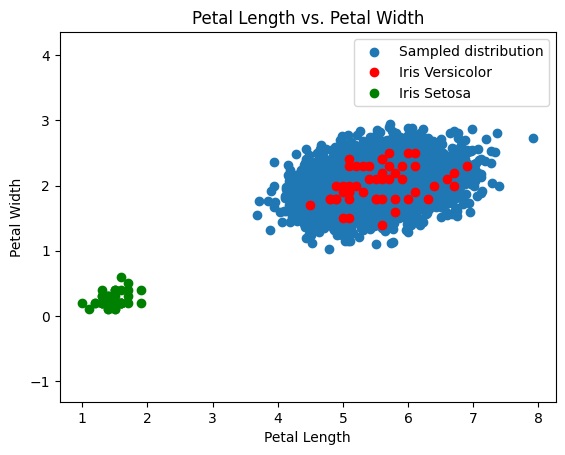

In [62]:
# 3.
# Sample 5000 points from a normal distribution with the same mean and covariance as Iris Versicolor class samples.

s = np.random.multivariate_normal(mean_versi, cov_versi, 5000)

# Plot these in a scatter plot with the same axis limits as 4.1.

plt.scatter(s[:, 0], s[:, 1])
plot_versi_setosa(['Sampled distribution', 'Iris Versicolor', 'Iris Setosa'])
plt.axis('equal')
refresh()

Diagonal Matrix
[[ 3.16  0.  ]
 [ 0.   14.8 ]]
eigenvalues scaled
[[-0.55245287 -0.04908029]
 [-0.10622148  0.25526426]]


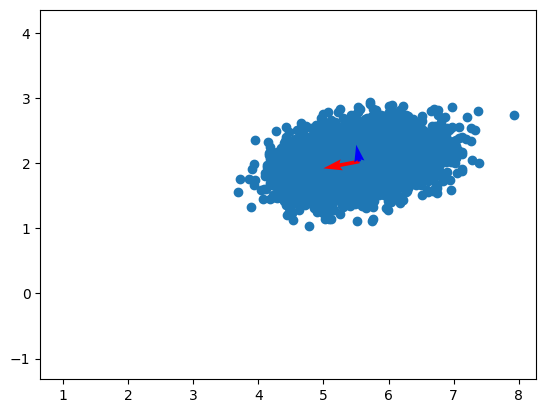

In [63]:
# 4.
# inverse cov matrix of s
inv_cov_s = LA.inv(np.cov(s, rowvar=False))
# find the eigenvalues of the inverse covariance matrix
eigenvalues, V = LA.eigh(inv_cov_s)

# print(eigenvalues)
# print(V)

# Diagonalize the inverse covariance matrix of the newly sampled Iris Versicolor points.
diag = (LA.inv(V) @ inv_cov_s) @ V

print("Diagonal Matrix")
print(np.around(diag, 2))

# Then plot the eigenvectors (scaled by the squareroot of their eigenvalues) as the semi-minor and semi-major
# axes on the class distribution ”ellipse” of 5000 points.


V_scaled = V*1/np.sqrt(eigenvalues)
print("eigenvalues scaled")
print(V_scaled)
plt.axis('equal')
plt.scatter(s[:, 0], s[:, 1])
# plot_versi_setosa(['Sampled distribution', 'Iris Versicolor', 'Iris Setosa'])

plt.quiver(mean_versi[0], mean_versi[1], V_scaled[0, 0], V_scaled[1, 0], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(mean_versi[0], mean_versi[1], V_scaled[0, 1], V_scaled[1, 1], angles='xy', scale_units='xy', scale=1, color='b')

set_pltlimits()
refresh()

transformation matrix
[[-1.75 -0.73]
 [-0.34  3.78]]


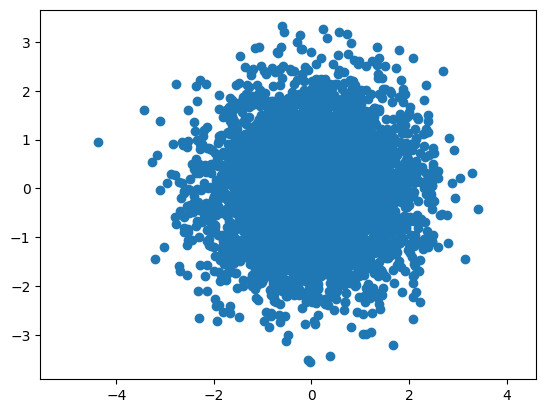

New covariance matrix
[[ 1. -0.]
 [-0.  1.]]
Is close to identity matrix: True


In [64]:
# Transform your coordinate system: find a coordinate transformation matrix so the Iris Versicolor class distribution ”ellipse” becomes circular.
norm_eigvals = np.diag(np.sqrt(eigenvalues))
T = LA.inv(V) @ norm_eigvals
print("transformation matrix")
print(np.around(T, 2))

# Transform the coordinates of all points sampled in 5.3 and create a new scatter plot that should look like a circular distribution.
circular_versi = (s - mean_versi) @ T
plt.scatter(circular_versi[:, 0], circular_versi[:, 1])
plt.axis('equal')
refresh()

# Write down what this is Transformation matrix is (hint, look at the diagonalization).
# Check that your new covariance matrix should be close to the Identity matrix (1-2 significant digit close).

cov_circular_versi = np.cov(circular_versi, rowvar=False)
print("New covariance matrix")
print(np.around(cov_circular_versi, 2))

is_close_to_identity = np.allclose(cov_circular_versi, np.eye(2), rtol=0.01)  # Adjust rtol as needed
print("Is close to identity matrix: " + str(is_close_to_identity))

In [65]:
# V is symmetric
print(V)
print(V.T)
print(LA.inv(V))

[[-0.98201286 -0.18881404]
 [-0.18881404  0.98201286]]
[[-0.98201286 -0.18881404]
 [-0.18881404  0.98201286]]
[[-0.98201286 -0.18881404]
 [-0.18881404  0.98201286]]
